In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

# 함수 정의

In [15]:
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
def def_tanh(x):
    return 1 - (x**2)

In [16]:
def linear(x):
    return x
def def_linear(x):
    return 1

# 데이터 불러오기 및 전처리

In [2]:
trn = pd.read_csv('./hw2_data.csv')
trn

,-3.245269596,-0.97375032
0,2.377048,-0.745718
1,0.368537,0.949275
2,1.725189,-0.125650
3,-1.443666,0.142073
4,-4.929794,0.211627
...,...,...
4994,2.759167,-0.934015
4995,4.402311,-0.296167
4996,-4.700185,-0.018308
4997,-4.631617,-0.070405


In [110]:
trn['x'] = trn['-3.245269596']
trn['y'] = trn['-0.97375032']
temp_x = pd.DataFrame(trn['x'], columns = ['x'])
temp_y = pd.DataFrame(trn['y'], columns = ['y'])
temp_x

,x
0,2.377048
1,0.368537
2,1.725189
3,-1.443666
4,-4.929794
...,...
4994,2.759167
4995,4.402311
4996,-4.700185
4997,-4.631617


In [111]:
temp = {'x': -3.245269596}
temp_x = temp_x.append(temp, ignore_index = True)
temp_x

,x
0,2.377048
1,0.368537
2,1.725189
3,-1.443666
4,-4.929794
...,...
4995,4.402311
4996,-4.700185
4997,-4.631617
4998,-0.101608


In [112]:
temp = {'y': -0.97375032}
temp_y = temp_y.append(temp, ignore_index = True)
temp_y

,y
0,-0.745718
1,0.949275
2,-0.125650
3,0.142073
4,0.211627
...,...
4995,-0.296167
4996,-0.018308
4997,-0.070405
4998,0.961612


In [113]:
#데이터 스케일링 전, 이상치를 탐색한다

def outliers(target, n, features):
    outlier = []
    for i in features:
        Q1 = np.percentile(target[i], 25)
        Q3 = np.percentile(target[i], 75)
        IQR = Q3 - Q1
        
        restrict = 1.5 * IQR
        outlier_list_col = target[(target[i] < Q1 - restrict) | (target[i] > Q3 + restrict)].index
        outlier.extend(outlier_list_col)
    outlier = Counter(outlier)
    multiple_outliers = list(k for k, v in outlier.items() if v > n)
    
    return multiple_outliers
outlier_to_drop = outliers(temp_x, 1, ['x'])

In [114]:
temp_x.loc[outlier_to_drop]

,x


In [115]:
# 새로운 피쳐 생성 (기존 x1 데이터를 표준화)
temp_x['x2'] = (temp_x['x'] - temp_x['x'].min()) / (temp_x['x'].max() - temp_x['x'].min())
temp_x

,x,x2
0,2.377048,0.737650
1,0.368537,0.536706
2,1.725189,0.672434
3,-1.443666,0.355401
4,-4.929794,0.006627
...,...,...
4995,4.402311,0.940270
4996,-4.700185,0.029599
4997,-4.631617,0.036459
4998,-0.101608,0.489669


In [116]:
#또 다른 방법
temp_x['x2'] = (temp_x['x'] - temp_x['x'].mean()) / temp_x['x'].std()
temp_x

,x,x2
0,2.377048,0.823129
1,0.368537,0.121872
2,1.725189,0.595537
3,-1.443666,-0.510845
4,-4.929794,-1.728001
...,...,...
4995,4.402311,1.530235
4996,-4.700185,-1.647835
4997,-4.631617,-1.623895
4998,-0.101608,-0.042276


In [117]:
temp_x['x2'] = (temp_x['x'] - temp_x['x'].mean()) / temp_x['x'].std()
temp_x

,x,x2
0,2.377048,0.823129
1,0.368537,0.121872
2,1.725189,0.595537
3,-1.443666,-0.510845
4,-4.929794,-1.728001
...,...,...
4995,4.402311,1.530235
4996,-4.700185,-1.647835
4997,-4.631617,-1.623895
4998,-0.101608,-0.042276


# 변수 선언 및 행렬 생성

In [118]:
x1 = temp_x['x']
x2 = temp_x['x2']
Y = temp_y['y']

#인풋 생성
X = []
for i in range(0, 5000):
    temp = [x1[i], x2[i]]
    X.append(temp)
X = np.array(X)
y = []
for i in range(0, 5000):
    temp = [Y[i]]
    y.append(temp)
y = np.array(y)

In [119]:
X

array([[ 2.37704815,  0.82312895],
       [ 0.36853675,  0.12187208],
       [ 1.72518879,  0.59553709],
       ...,
       [-4.63161724, -1.62389462],
       [-0.10160824, -0.04227556],
       [-3.2452696 , -1.13986161]])

In [120]:
y

array([[-0.74571837],
       [ 0.94927486],
       [-0.12564982],
       ...,
       [-0.07040545],
       [ 0.96161248],
       [-0.97375032]])

In [121]:
# 그래프 구현을 위한 작업
x1 = np.array(x1)
x1

array([ 2.37704815,  0.36853675,  1.72518879, ..., -4.63161724,
       -0.10160824, -3.2452696 ])

# 모델 구현 및 학습

### First Weight & bias ###
[w11] : 0.391845 [w21] : -0.524736 

[w21] : -0.524736 [w22] : -0.568168 

[w31] : -0.075788 [w32] : 0.911701 

[bias1] : 0.005558 [bias2] : 0.002885 [bias3] : 0.448249
[ 0 ] 회 ====[error]====
 [0.76109997]
[ 1000 ] 회 ====[error]====
 [0.04018889]
[ 2000 ] 회 ====[error]====
 [0.0396883]
[ 3000 ] 회 ====[error]====
 [0.03955325]
[ 4000 ] 회 ====[error]====
 [0.03950994]
[ 5000 ] 회 ====[error]====
 [0.03949459]
[ 6000 ] 회 ====[error]====
 [0.03948883]
[ 7000 ] 회 ====[error]====
 [0.03948659]
[ 8000 ] 회 ====[error]====
 [0.0394857]
[ 9000 ] 회 ====[error]====
 [0.03948534]

 #### 결과그래프 ####



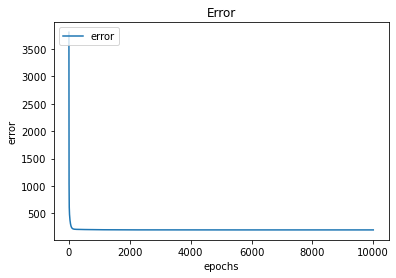

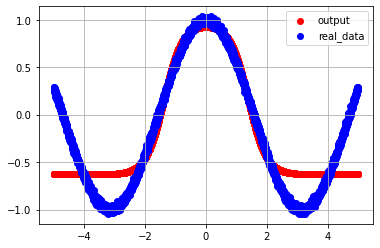


#####Final Weights & Bias#####

[w11] : 1.276964 [w12] : 1.169382 

[w21] : -1.385891 [w22] : -0.869525 

[w31] : 0.791816 [w32] : 1.169382 

[bias1] : 2.332913 [bias2] : 2.330239 [bias3] : -0.628868


In [124]:
# 학습 횟수와 learning rate 설정
learning_rate = 0.1
epoch = 10000

#에러 및 횟수 저장
epochs = []
errors = []
# 초기 가중치와 편향 설정을 위한 난수 생성
bias1 = np.random.uniform(0, 1)
bias2 = np.random.uniform(0,1)
bias3 = np.random.uniform(0,1)

w11 = np.random.uniform(-1, 1)
w21 = np.random.uniform(-1, 1)
w12 = np.random.uniform(-1, 1)
w22 = np.random.uniform(-1, 1)

w31 = np.random.uniform(-1, 1)
w32 = np.random.uniform(-1, 1)

print("### First Weight & bias ###")
print("[w11] : %f [w21] : %f \n" %(w11, w21))
print("[w21] : %f [w22] : %f \n" %(w21, w22))
print("[w31] : %f [w32] : %f \n" %(w31, w32))
print("[bias1] : %f [bias2] : %f [bias3] : %f" %(bias1, bias2, bias3))

# 행렬 연산을 위해 행렬 생성
bias_to_hidden = np.array([[bias1, bias2]])
bias_to_output = np.array([[bias3]])

weight_to_hidden = np.array([[w11, w21], [w12, w22]])
weight_to_output = np.array([[w31], [w32]])

for i in range(0, epoch):
    epochs.append(i)
    # Forwardpropagation
    z2 = np.dot(X, weight_to_hidden) + bias_to_hidden
    s2 = tanh(z2)

    z3 = np.dot(s2, weight_to_output) + bias_to_output
    output = linear(z3)

    error = (y - output)**2 / 2
    errors.append(np.sum(error))

    if i % 1000 == 0:
        print("[", i, "]", "회 ====[error]====\n", sum(error)/5000)
        if sum(error)/5000 < 0.01 :
            break
    
    # Backpropagation
    gradient_bias2 = (output - y) * def_linear(output)
    gradient_w3 = s2.T.dot((output - y) * def_linear(output))
    gradient_bias1 = (((output - y) * def_linear(output)).dot(weight_to_output.T)) * def_tanh(s2)
    gradient_w2 = X.T.dot((((output - y) * def_linear(output)).dot(weight_to_output.T)) * def_tanh(s2))
    
    # 가중치 및 편향 조정
    bias_to_output = bias_to_output - np.sum(gradient_bias2)/5000
    weight_to_output = weight_to_output - learning_rate * gradient_w3/5000
    bias_to_hidden = bias_to_hidden - np.sum(gradient_bias1)/5000
    weight_to_hidden = weight_to_hidden - learning_rate * gradient_w2/5000
    
    
print("\n #### 결과그래프 ####\n")
plt.plot(epochs, errors)       
plt.title('Error')
plt.ylabel('error')
plt.xlabel('epochs')
plt.legend(['error', 'epochs'], loc = 'upper left')
plt.show()

plt.scatter(x1, output, color = 'red', label = 'output')
plt.scatter(x1, y, color = 'blue', label = 'real_data')
plt.grid()
plt.legend(loc = 'best')
plt.show()

#최종 가중치 저장 및 결과 값 출력
bias1 = bias_to_hidden[0][0]
bias2 = bias_to_hidden[0][1]
bias3 = bias_to_output[0][0]

w11 = weight_to_hidden[0][0]
w21 = weight_to_hidden[0][1]
w12 = weight_to_hidden[1][0]
w22 = weight_to_hidden[1][1]

w31 = weight_to_output[0][0]
w32 = weight_to_hidden[1][0]

print("\n#####Final Weights & Bias#####\n")
print("[w11] : %f [w12] : %f \n" %(w11, w12))
print("[w21] : %f [w22] : %f \n" %(w21, w22))
print("[w31] : %f [w32] : %f \n" %(w31, w32))
print("[bias1] : %f [bias2] : %f [bias3] : %f" %(bias1, bias2, bias3))